# Beijing Air Quality

## Exploratory Data Analysis


### Import packages and data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import fill
%matplotlib inline
# Styling Guide
plt.style.use('fivethirtyeight')
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))

df = pd.read_pickle('PKL/full.pkl')
#df = df.groupby('station').resample('D').mean()
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day


### Numerical Analysis

Before we go into the visualizations, let us take a look at the numerical breakdown of the data

In [10]:
df.describe(include = 'all')


,PM2.5,station,Month,Year,Day
count,403776.000000,403776,403776.000000,403776.000000,403776.000000
unique,NaN,12,NaN,NaN,NaN
top,NaN,Tiantan,NaN,NaN,NaN
freq,NaN,33648,NaN,NaN,NaN
mean,79.310815,NaN,6.735378,2014.564194,15.748217
std,79.317017,NaN,3.356479,1.097503,8.808891
min,2.000000,NaN,1.000000,2013.000000,1.000000
25%,21.000000,NaN,4.000000,2014.000000,8.000000
50%,55.000000,NaN,7.000000,2015.000000,16.000000
75%,110.000000,NaN,10.000000,2016.000000,23.000000


In [11]:
df.head()

,PM2.5,station,Month,Year,Day
Date,,,,,
2013-03-01 00:00:00,6.0,Gucheng,3,2013,1
2013-03-01 01:00:00,6.0,Gucheng,3,2013,1
2013-03-01 02:00:00,5.0,Gucheng,3,2013,1
2013-03-01 03:00:00,6.0,Gucheng,3,2013,1
2013-03-01 04:00:00,5.0,Gucheng,3,2013,1


### Visual Analysis

## Looking at the monthly and yearly progression of the weather data

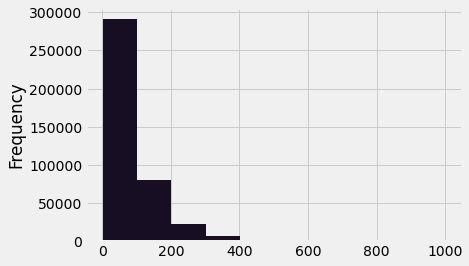

In [12]:
# non normal distribution

df['PM2.5'].plot.hist()

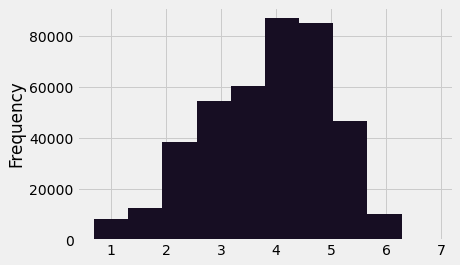

In [13]:
#it now has a normal distribution

np.log(df['PM2.5']).plot.hist()


In [14]:
df['log_PM2.5'] = np.log(df['PM2.5'])

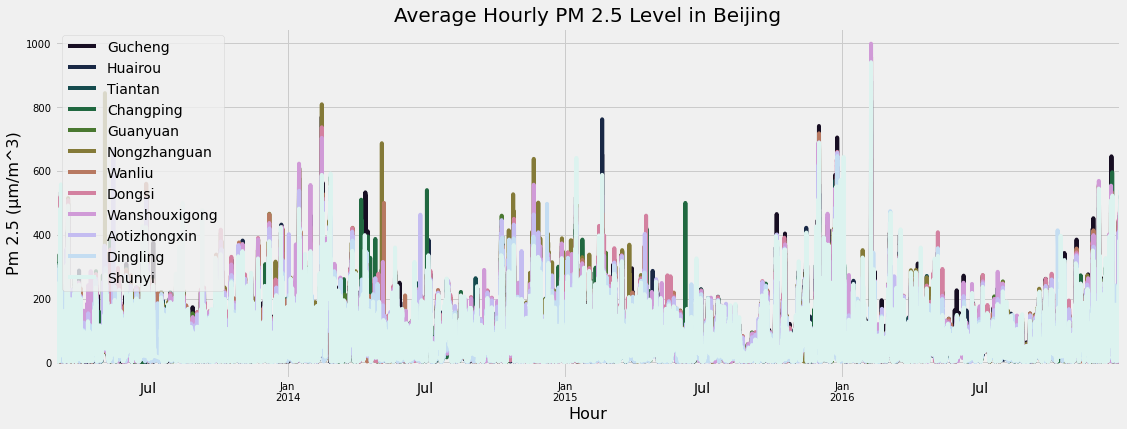

In [15]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['PM2.5'].resample(rule = 'H').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Average Hourly PM 2.5 Level in Beijing', size = 20)
plt.xlabel('Hour', size = 16)
plt.ylabel('Pm 2.5 (μm/m^3)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

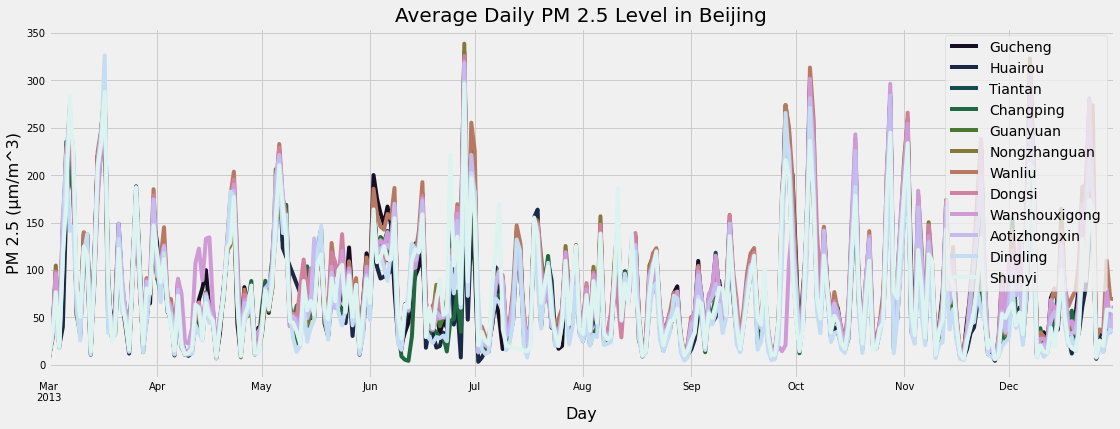

In [16]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[(df['station'].eq(x)) & ((df['Year'].eq(2013)))]['PM2.5'].resample(rule = 'D').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Average Daily PM 2.5 Level in Beijing', size = 20)
plt.xlabel('Day', size = 16)
plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

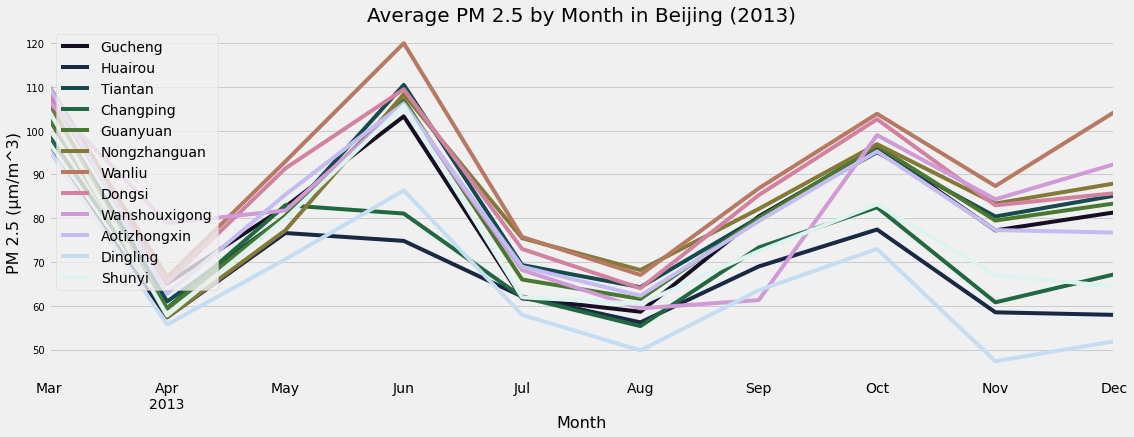

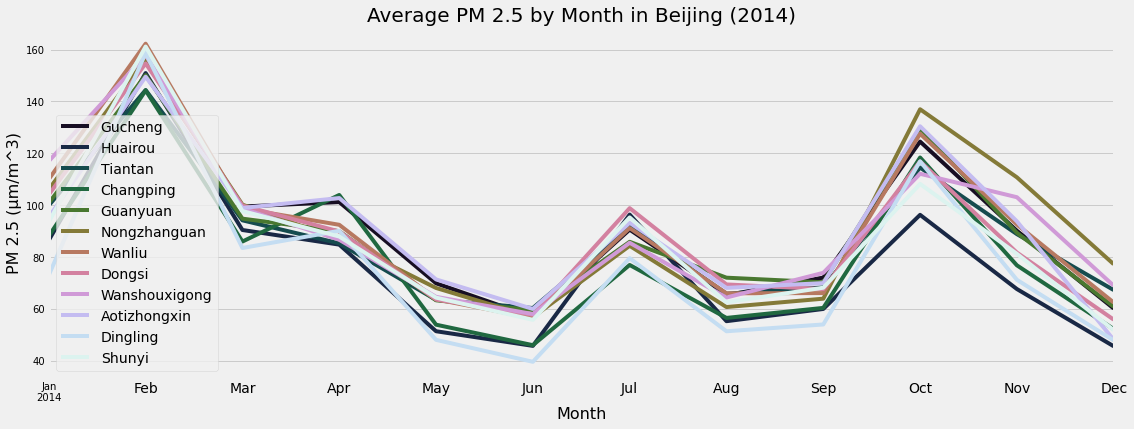

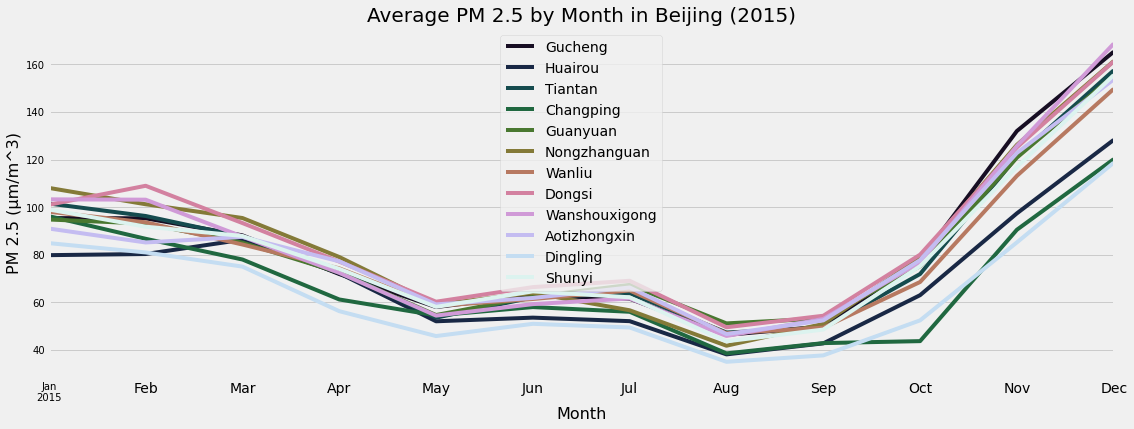

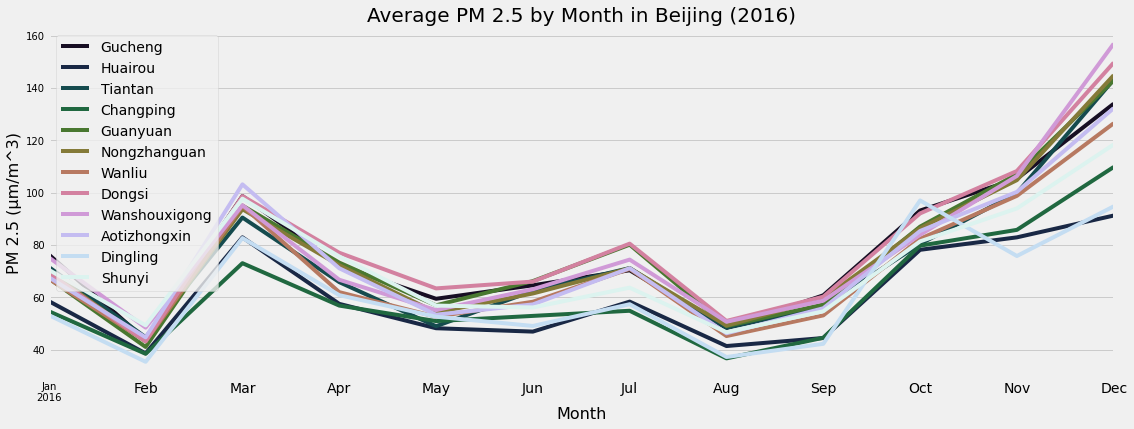

In [17]:
#Average temperature is cyclical


for y in df.Year.unique():
    fig, ax = plt.subplots(figsize = (17,6))
    for x in df.station.unique():
        df[(df['station'].eq(x)) & ((df['Year'].eq(y)))]['PM2.5'].resample(rule = 'M').mean().plot(label = x)
        ax.legend(loc = 'best')
        plt.title('Average PM 2.5 by Month in Beijing (' + str(y) +')', size = 20)
        plt.xlabel('Month', size = 16)
        plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
        plt.xticks(size = 10)
        plt.yticks(size = 10);

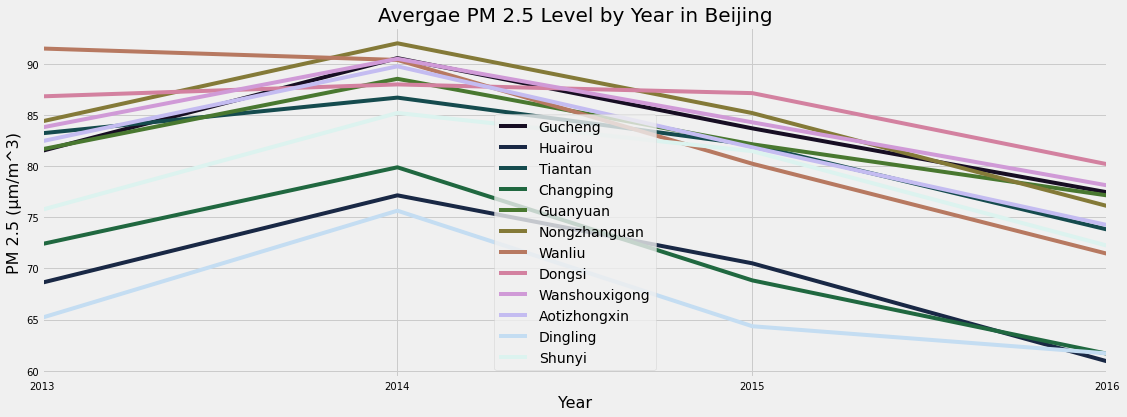

In [19]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['PM2.5'].resample(rule = 'Y').mean().plot(label = x)

ax.legend(loc = 'best')
plt.title('Avergae PM 2.5 Level by Year in Beijing', size = 20)
plt.xlabel('Year', size = 16)
plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10);

In [21]:
stations = ['Gucheng',
 'Huairou',
 'Tiantan',
 'Changping',
 'Guanyuan',
 'Nongzhanguan',
 'Wanliu',
 'Dongsi',
 'Wanshouxigong',
 'Aotizhongxin',
 'Dingling',
 'Shunyi']
features = ['PM2.5','log_PM2.5']

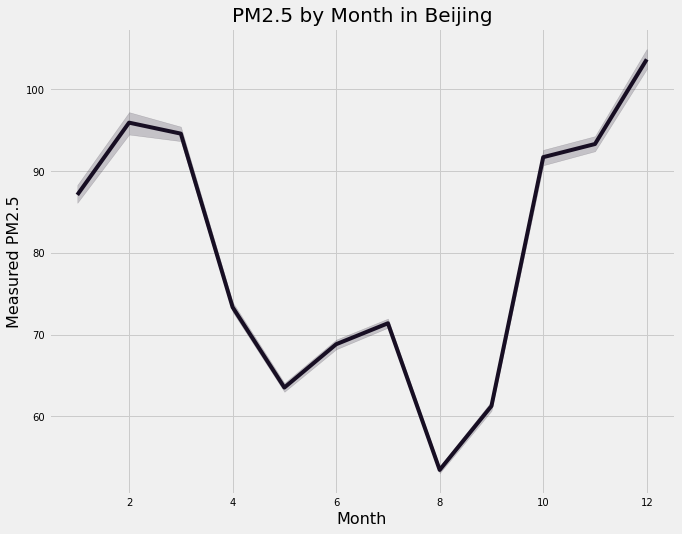

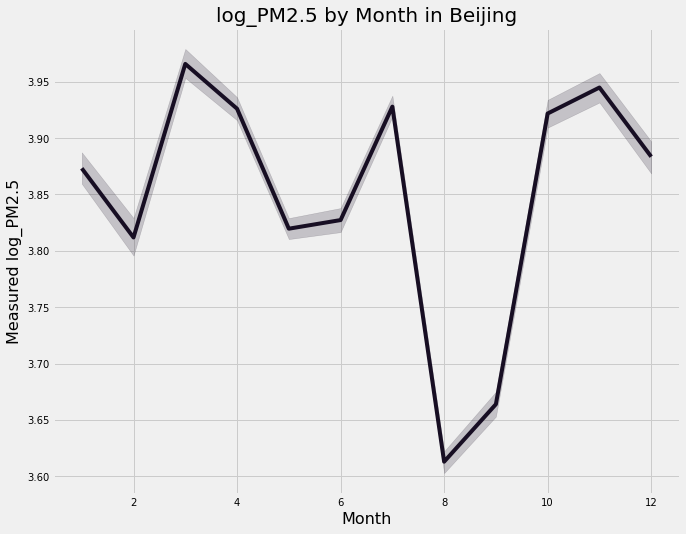

In [22]:
for f in df[features]:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Month', y = f, data = df);
    plt.title(f + ' by Month in Beijing', size = 20)
    plt.xlabel('Month', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);

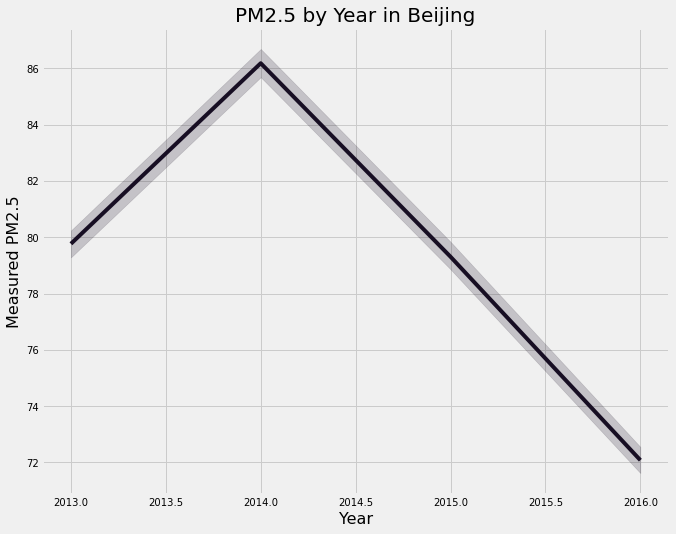

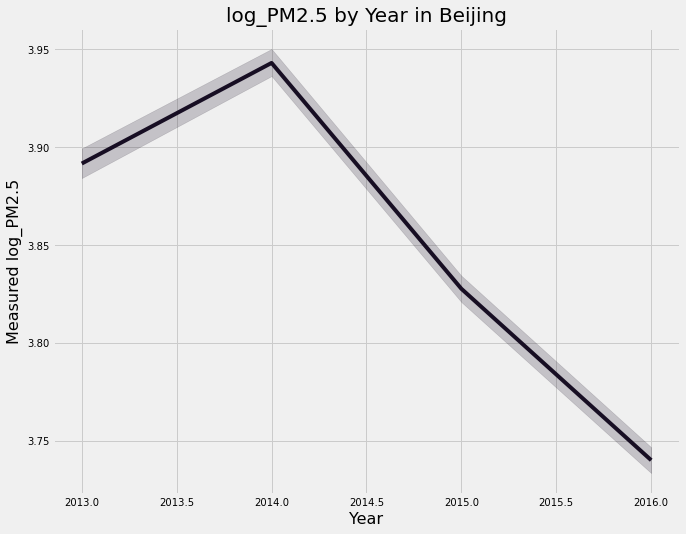

In [23]:
for f in df[features]:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Year', y = f, data = df);
    plt.title(f + ' by Year in Beijing', size = 20)
    plt.xlabel('Year', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);


In [24]:
df.describe()

,PM2.5,Month,Year,Day,log_PM2.5
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000
mean,79.310815,6.735378,2014.564194,15.748217,3.848812
std,79.317017,3.356479,1.097503,8.808891,1.125779
min,2.000000,1.000000,2013.000000,1.000000,0.693147
25%,21.000000,4.000000,2014.000000,8.000000,3.044522
50%,55.000000,7.000000,2015.000000,16.000000,4.007333
75%,110.000000,10.000000,2016.000000,23.000000,4.700480
max,999.000000,12.000000,2016.000000,31.000000,6.906755


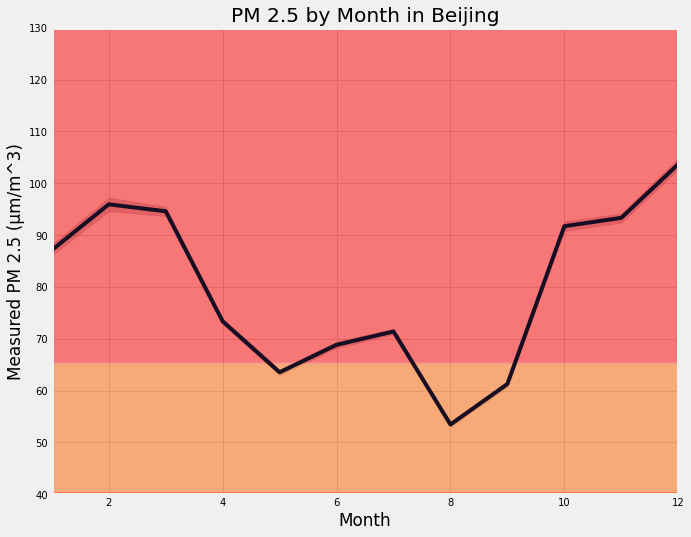

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x = 'Month', y = 'PM2.5', data = df);
ax.set(xlabel='Month',
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='PM 2.5 by Month in Beijing',
       xlim=[1, 12],ylim=[40,130])
plt.xticks(size = 10)
plt.yticks(size = 10)
fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.5, edgecolor='r')

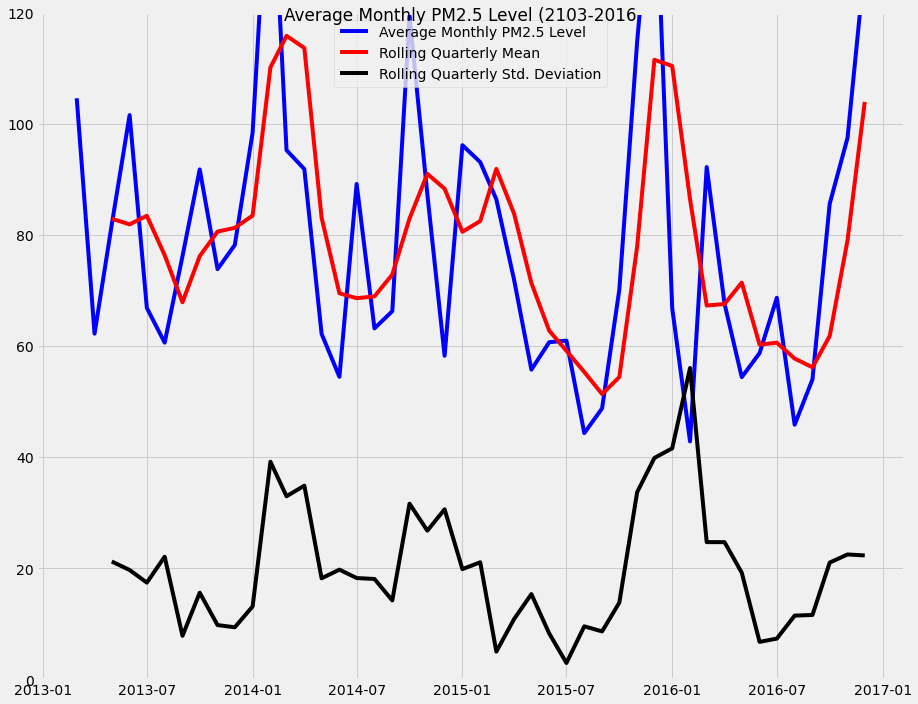

In [26]:
df_ = df['PM2.5'].resample('MS').mean()
#open_monthly_series = df.open

roll_mean = df_.rolling(window = 3).mean()
roll_std = df_.rolling(window = 3).std()


fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(df_, color='blue',label='Average Monthly PM2.5 Level')
ax.plot(roll_mean, color='red', label='Rolling Quarterly Mean')
ax.plot(roll_std, color='black', label='Rolling Quarterly Std. Deviation')
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle('Average Monthly PM2.5 Level (2103-2016')
fig.tight_layout()

In [28]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['PM2.5'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(-51.567759998385924, 0.0, 96, 403679, {'1%': -3.4303661993603405, '5%': -2.8615471599228317, '10%': -2.566773810966036}, 3529901.428265695)
Results of Dickey-Fuller test: 

Test Statistic                    -51.567760
p-value                             0.000000
#Lags Used                         96.000000
Number of Observations Used    403679.000000
Critical Value (1%)                -3.430366
Critical Value (5%)                -2.861547
Critical Value (10%)               -2.566774
dtype: float64


In [35]:
df_diff = df[features].diff()

test = adfuller(df_diff['PM2.5'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)



Test Statistic                    -95.407897
p-value                             0.000000
#Lags Used                         96.000000
Number of Observations Used    403678.000000
dtype: float64


In [ ]:
df_diff = df[features].diff()

test = adfuller(df_diff['log_PM2.5'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)


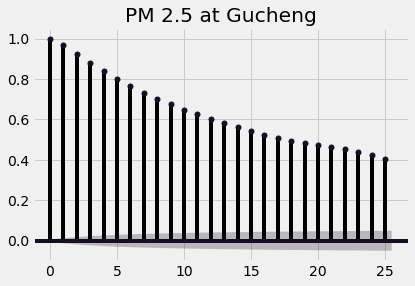

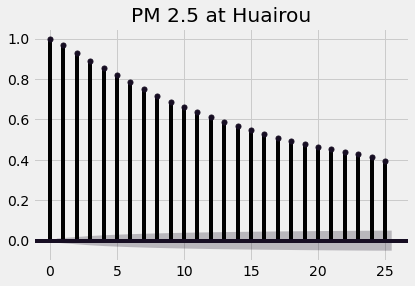

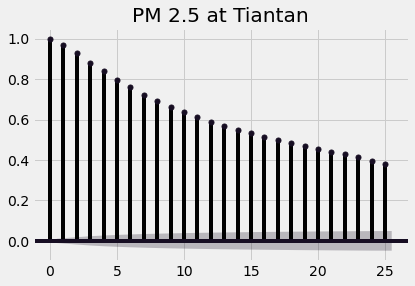

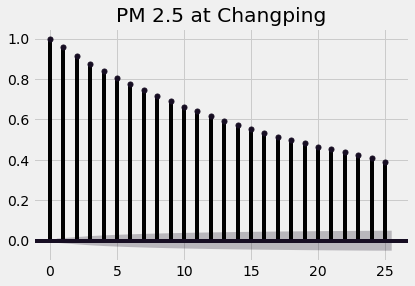

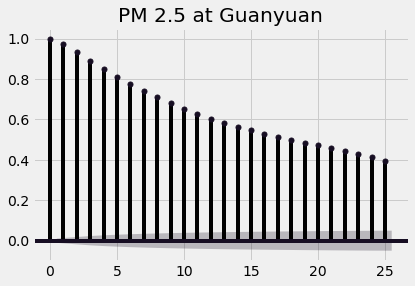

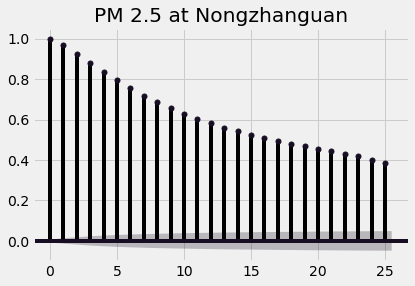

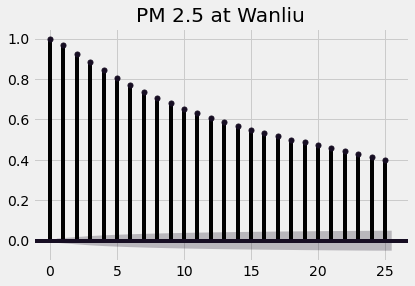

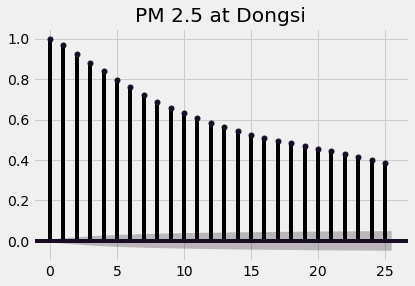

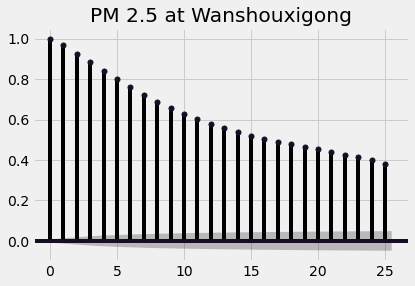

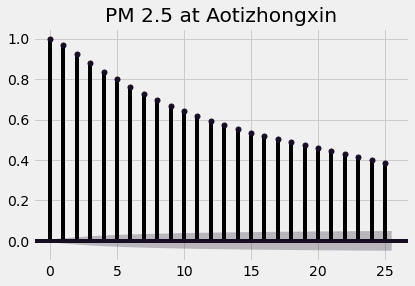

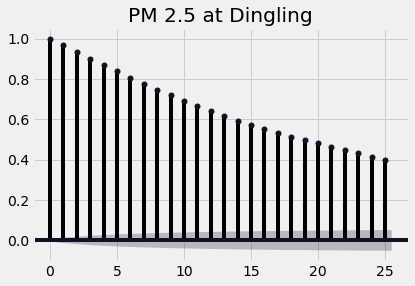

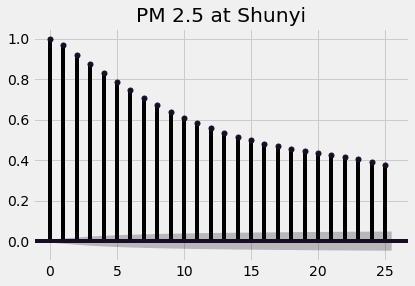

In [36]:
for x in stations:
    plot_acf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

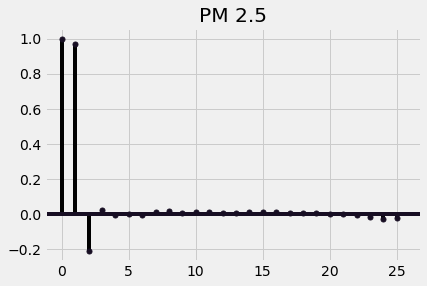

In [37]:
plot_pacf(df["PM2.5"],lags=25, title = 'PM 2.5')
plt.show()

In [ ]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

In [ ]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["RAIN"],lags=25, title = 'Rain at ' + x)
    plt.show()



In [ ]:
def dickey_fuller_test_all_zip(df):
    for feature in df[features]:
        dftest = adfuller(df[feature])
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        print(dftest)

        print ('Results of Dickey-Fuller Test for '+feature+ ':')
        print ('\n')
        print(dfoutput)

In [ ]:
dickey_fuller_test_all_zip(df)

